## EDA Univariate Analysis: Diving into Amazon UK Product Insights

### Part 0: Loaad the dataset

Load the information to a dataframe, import the necessary libraries and other necessary configurations to get started.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from kaggle.api.kaggle_api_extended import KaggleApi

In [9]:
api = KaggleApi()
api.authenticate()

# Download the dataset using the Kaggle API
api.dataset_download_files('asaniczka/uk-optimal-product-price-prediction', path='.', unzip=True)

# Read CSV file using pandas
import pandas as pd
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Show the first columns of the dataframe
df.head(5)

Dataset URL: https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [17]:
# Create a frequency table
category_freq_table = df['category'].value_counts()

In [19]:
# Select the top 5 categories

top_5_categories = category_freq_table.sort_values(ascending=False).head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

C:\Users\almuo\AppData\Local\Temp\ipykernel_5976\3595170881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3")


<Axes: xlabel='category'>

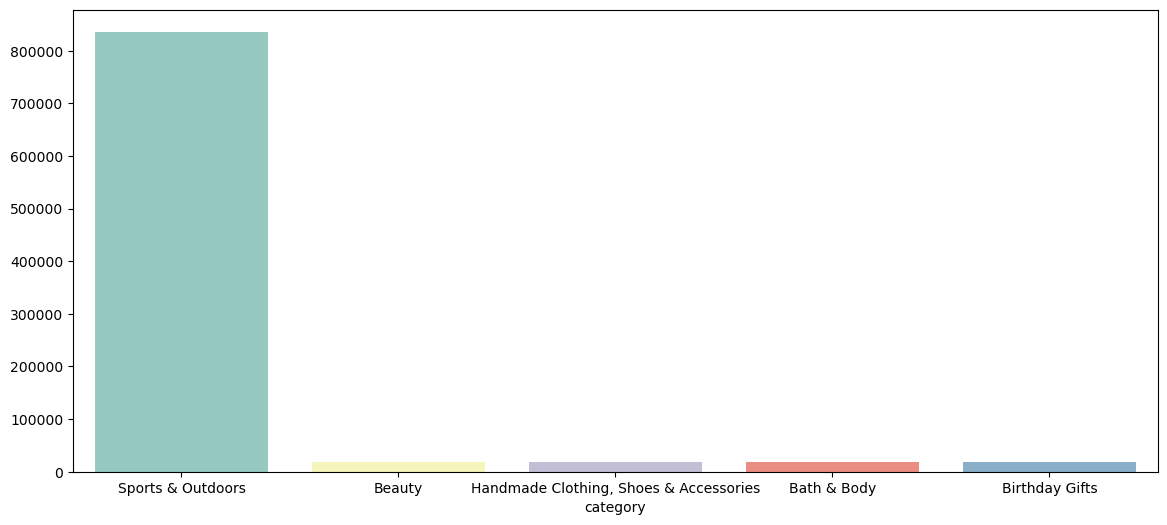

In [25]:
#Create the barplot
plt.figure(figsize=(14, 6))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3")

<Axes: ylabel='count'>

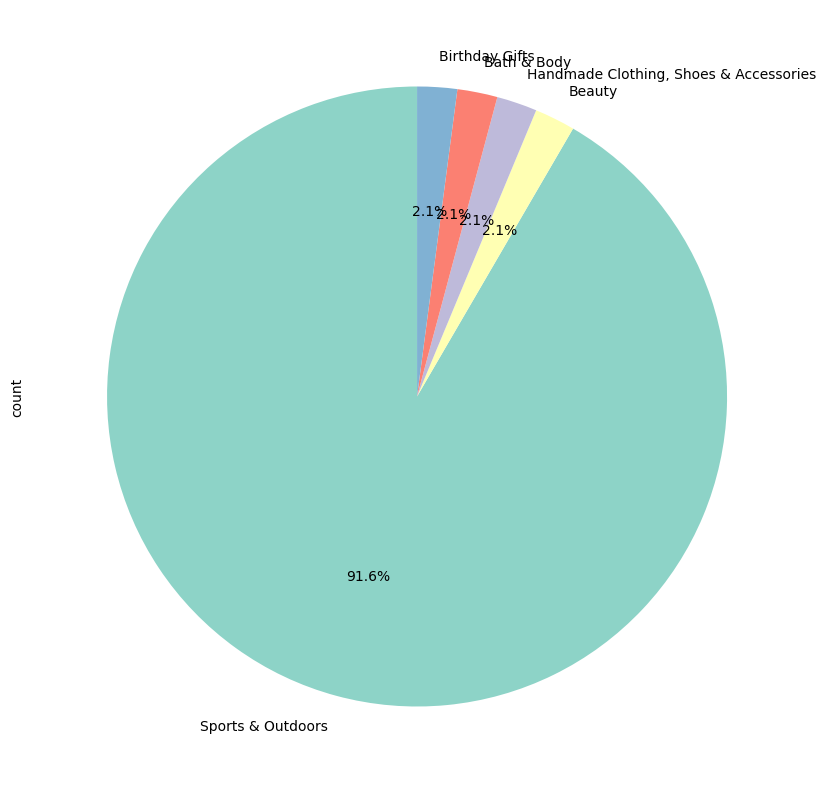

In [28]:
#Create the pie chart
plt.figure(figsize=(10, 12))
top_5_categories.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [32]:
#Calculate the mean, median, and mode for the `price` of products.

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

- The mean price of products is 89.24, while the mode (most common price) is 9.99, which is much lower. This indicates that the distribution is right-skewed, meaning there are a few higher-priced products pulling the average up. Most products have lower prices, but the long tail of expensive products distorts the mean upwards.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [37]:
#Calculate the variance, standard deviation, range and interquartile for the 'price' column
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

- The variance is 119445.49 and the standard deviation is 345.61. Both are high, indicating that prices are widely spread from the mean.
- Also, the range of prices is 100000, showing a wide gap between the lowest and highest prices.
- In addition, from 9.99 at the 25th percentile to 45.99 at the 75th percentile, means that 50% of the products are priced in a small range, but there are some very high-priced outliers.

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?